In [69]:
import warnings
import pandas as pd
# Suppress warnings
warnings.filterwarnings('ignore')

In [70]:
ec_data = pd.read_csv('quinn_tenyears_pre_processed.csv').iloc[:,3:5]

In [71]:
ec_data['timestamp'] = pd.to_datetime(ec_data['timestamp'])
ec_data

,electric consumption,timestamp
0,24.862499,2013-01-01 00:00:00
1,24.779999,2013-01-01 00:15:00
2,25.199999,2013-01-01 00:30:00
3,25.514999,2013-01-01 00:45:00
4,24.812500,2013-01-01 01:00:00
...,...,...
297211,18.092499,2023-12-14 22:45:00
297212,15.132500,2023-12-14 23:00:00
297213,15.077499,2023-12-14 23:15:00
297214,14.832500,2023-12-14 23:30:00


In [72]:
import pandas as pd
weather_df = pd.read_csv('merged_quinn_weather.csv')

weather_df = weather_df[['temp','timestamp','electric consumption']]


# Convert timestamp columns to datetime format for accurate merging
weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"])
ec_data["timestamp"] = pd.to_datetime(ec_data["timestamp"])

# Merge on timestamp
merged_df = pd.merge(weather_df, ec_data, on="timestamp", how="inner")

# Display the merged DataFrame
merged_df


,temp,timestamp,electric consumption_x,electric consumption_y
0,2.7,2013-01-01 00:00:00,100.357496,24.862499
1,3.2,2013-01-01 01:00:00,100.169998,24.812500
2,2.7,2013-01-01 02:00:00,101.797499,25.542500
3,2.5,2013-01-01 03:00:00,102.809998,25.507500
4,2.7,2013-01-01 04:00:00,101.722498,25.584999
...,...,...,...,...
74299,8.1,2023-12-14 19:00:00,133.469997,32.052498
74300,8.0,2023-12-14 20:00:00,121.089996,32.514999
74301,8.3,2023-12-14 21:00:00,111.987497,28.487499
74302,8.3,2023-12-14 22:00:00,83.122498,23.959999


In [73]:
# df = pd.DataFrame(ec_data)
df = merged_df
# Pivot the data
df['Date'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time

# Reshape using pivot
pivot_df = df.pivot(index='Date', columns='Time', values='electric consumption_x')

# Display the reshaped DataFrame
pivot_df.reset_index(inplace=True) 
(pivot_df)

Time,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2013-01-01,100.357496,100.169998,101.797499,102.809998,101.722498,100.202497,104.159996,103.887497,96.312498,...,84.932499,84.137497,90.487497,104.392498,101.934998,103.314997,105.424997,104.552498,103.152498,103.114998
1,2013-01-02,125.609999,126.367498,126.514996,130.022495,138.342503,137.564999,169.909996,187.169994,182.054996,...,176.487495,176.962494,164.524998,176.397495,170.590000,170.059998,171.274994,166.894997,140.877499,124.359997
2,2013-01-03,117.769997,119.084997,116.949997,120.009998,128.644999,127.972498,165.200001,163.974995,168.145000,...,173.094997,168.227497,155.524994,149.729996,150.782501,155.189999,153.277493,153.662495,130.604996,112.689999
3,2013-01-04,118.099998,119.114996,121.542500,131.604996,132.342499,134.224998,118.837498,117.587498,118.869997,...,119.859997,117.519997,116.632496,116.657495,116.627497,131.634995,134.489998,121.159994,118.817497,119.044998
4,2013-01-05,61.417499,61.299998,61.559999,62.244999,58.522497,74.657499,94.830000,100.224997,107.152498,...,113.629999,101.152498,89.099998,81.567499,82.717497,81.642500,95.817497,70.092498,59.557498,58.852499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2023-12-10,66.352497,66.607498,61.462500,53.769999,61.522499,100.912497,142.025000,172.442497,168.747498,...,191.284996,173.737495,142.722496,134.857498,135.444996,115.749998,112.584995,74.684998,55.757499,53.629999
3092,2023-12-11,60.189999,62.590000,59.804998,60.244999,60.244999,60.934999,59.664998,59.677498,48.660000,...,60.155000,67.047499,64.989998,77.472498,75.932499,62.572498,59.759998,58.382499,58.230000,58.414998
3093,2023-12-12,64.002500,64.454998,64.167500,64.202499,64.832500,65.062498,93.932497,135.414999,158.112492,...,169.062496,173.614998,165.852501,153.022499,153.344997,145.809998,132.074995,116.512497,86.139997,69.054996
3094,2023-12-13,69.404997,74.264999,73.292498,72.079998,76.732498,80.647499,114.482498,141.434998,149.279995,...,150.594997,156.489994,163.114994,159.137497,166.024998,164.107494,147.277496,132.137501,87.429998,66.899998


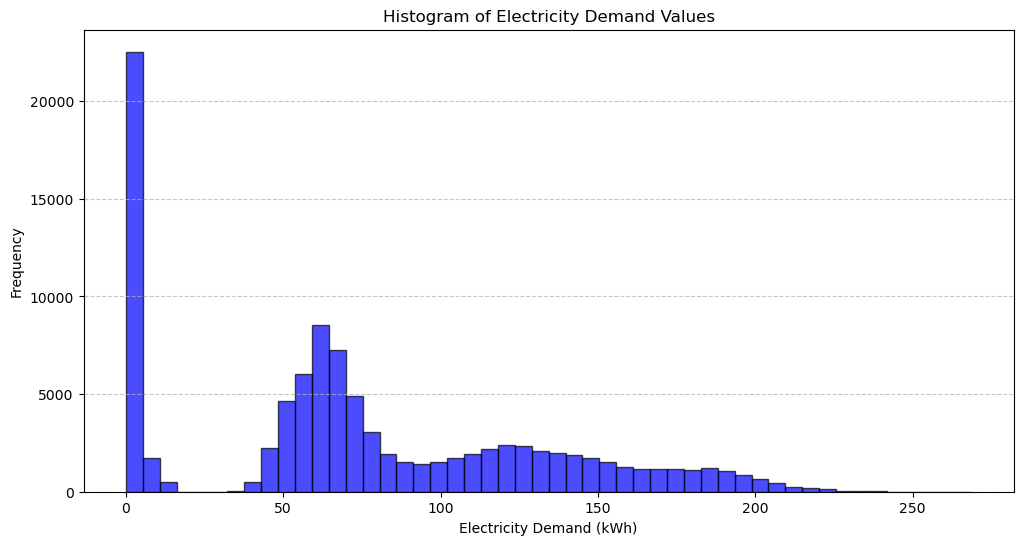

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

data_values = filtered_df.drop(columns=["Date"]).values.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(data_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Electricity Demand (kWh)")
plt.ylabel("Frequency")
plt.title("Histogram of Electricity Demand Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
# Filter the data based on start_date and end_date
start_date = '01-01-2013'
end_date = '01-01-2024'

pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])

# Filter the DataFrame
filtered_df = pivot_df[(pivot_df['Date'] >= start_date) & (pivot_df['Date'] < end_date)]

filtered_df

Time,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2013-01-01,100.357496,100.169998,101.797499,102.809998,101.722498,100.202497,104.159996,103.887497,96.312498,...,84.932499,84.137497,90.487497,104.392498,101.934998,103.314997,105.424997,104.552498,103.152498,103.114998
1,2013-01-02,125.609999,126.367498,126.514996,130.022495,138.342503,137.564999,169.909996,187.169994,182.054996,...,176.487495,176.962494,164.524998,176.397495,170.590000,170.059998,171.274994,166.894997,140.877499,124.359997
2,2013-01-03,117.769997,119.084997,116.949997,120.009998,128.644999,127.972498,165.200001,163.974995,168.145000,...,173.094997,168.227497,155.524994,149.729996,150.782501,155.189999,153.277493,153.662495,130.604996,112.689999
3,2013-01-04,118.099998,119.114996,121.542500,131.604996,132.342499,134.224998,118.837498,117.587498,118.869997,...,119.859997,117.519997,116.632496,116.657495,116.627497,131.634995,134.489998,121.159994,118.817497,119.044998
4,2013-01-05,61.417499,61.299998,61.559999,62.244999,58.522497,74.657499,94.830000,100.224997,107.152498,...,113.629999,101.152498,89.099998,81.567499,82.717497,81.642500,95.817497,70.092498,59.557498,58.852499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2023-12-10,66.352497,66.607498,61.462500,53.769999,61.522499,100.912497,142.025000,172.442497,168.747498,...,191.284996,173.737495,142.722496,134.857498,135.444996,115.749998,112.584995,74.684998,55.757499,53.629999
3092,2023-12-11,60.189999,62.590000,59.804998,60.244999,60.244999,60.934999,59.664998,59.677498,48.660000,...,60.155000,67.047499,64.989998,77.472498,75.932499,62.572498,59.759998,58.382499,58.230000,58.414998
3093,2023-12-12,64.002500,64.454998,64.167500,64.202499,64.832500,65.062498,93.932497,135.414999,158.112492,...,169.062496,173.614998,165.852501,153.022499,153.344997,145.809998,132.074995,116.512497,86.139997,69.054996
3094,2023-12-13,69.404997,74.264999,73.292498,72.079998,76.732498,80.647499,114.482498,141.434998,149.279995,...,150.594997,156.489994,163.114994,159.137497,166.024998,164.107494,147.277496,132.137501,87.429998,66.899998


In [76]:
import pandas as pd

# Function to determine if a date is during term time (only for the year 2022)
def is_term_time(timestamp):
    # Extract month and day from the timestamp
    month = timestamp.month
    day = timestamp.day
    
    # Autumn Semester: September (9) to mid-December (12)
    # Spring Semester: January (1) to late April (4)
    if (month == 9) or (month == 10) or (month == 11) or \
       (month == 12 and day <= 15) or \
       (month == 1) or (month == 2) or (month == 3) or \
       (month == 4 and day <= 30):  # Assuming April has full term up to end of the month
        return 1  # During term time
    else:
        return 0  # Not during term time

def add_time_features(df):
    df['Date'] = pd.to_datetime(df['Date'])

    ### add in the month of the year (Jan - Dec)
    df['month'] = df['Date'].dt.month  # January=1, December=12

    ### add in the day of the week (Monday - Friday)
    df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

    ### add in the hour of the day
    df['hour'] = df['Date'].dt.hour 

    # Define seasons based on months
    season_mapping = {
        1: 1,  # Winter
        2: 1,  # Winter
        12: 1, # Winter
        3: 2,  # Spring
        4: 2,  # Spring
        5: 2,  # Spring
        6: 3,  # Summer
        7: 3,  # Summer
        8: 3,  # Summer
        9: 4,  # Autumn
        10: 4, # Autumn
        11: 4  # Autumn
    }

    ### add in the season of the year (1: Winter, 2: Spring, 3: Summer, 4: Autumn)
    df['season'] = df['month'].map(season_mapping)

    ### add in weekday/weekend
    df['weekday'] = df['DayOfWeek'].apply(lambda x: 0 if x >= 5 else 1)

    ### add in the time of term (teaching/non-teaching)
    df['term_time'] = df['Date'].apply(is_term_time)

    ### add in term_week column
    df['term_week'] = df.apply(lambda row: 1 if row['term_time'] == 1 and row['weekday'] == 1 else 0, axis=1)

    return df

time_df = add_time_features(filtered_df)

In [77]:
filtered_df

Time,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,21:00:00,22:00:00,23:00:00,month,DayOfWeek,hour,season,weekday,term_time,term_week
0,2013-01-01,100.357496,100.169998,101.797499,102.809998,101.722498,100.202497,104.159996,103.887497,96.312498,...,104.552498,103.152498,103.114998,1,1,0,1,1,1,1
1,2013-01-02,125.609999,126.367498,126.514996,130.022495,138.342503,137.564999,169.909996,187.169994,182.054996,...,166.894997,140.877499,124.359997,1,2,0,1,1,1,1
2,2013-01-03,117.769997,119.084997,116.949997,120.009998,128.644999,127.972498,165.200001,163.974995,168.145000,...,153.662495,130.604996,112.689999,1,3,0,1,1,1,1
3,2013-01-04,118.099998,119.114996,121.542500,131.604996,132.342499,134.224998,118.837498,117.587498,118.869997,...,121.159994,118.817497,119.044998,1,4,0,1,1,1,1
4,2013-01-05,61.417499,61.299998,61.559999,62.244999,58.522497,74.657499,94.830000,100.224997,107.152498,...,70.092498,59.557498,58.852499,1,5,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2023-12-10,66.352497,66.607498,61.462500,53.769999,61.522499,100.912497,142.025000,172.442497,168.747498,...,74.684998,55.757499,53.629999,12,6,0,1,0,1,0
3092,2023-12-11,60.189999,62.590000,59.804998,60.244999,60.244999,60.934999,59.664998,59.677498,48.660000,...,58.382499,58.230000,58.414998,12,0,0,1,1,1,1
3093,2023-12-12,64.002500,64.454998,64.167500,64.202499,64.832500,65.062498,93.932497,135.414999,158.112492,...,116.512497,86.139997,69.054996,12,1,0,1,1,1,1
3094,2023-12-13,69.404997,74.264999,73.292498,72.079998,76.732498,80.647499,114.482498,141.434998,149.279995,...,132.137501,87.429998,66.899998,12,2,0,1,1,1,1


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Ensure 'Date' is a datetime object
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Extract day of the week (Monday = 0, ..., Sunday = 6)
filtered_df['DayOfWeek'] = filtered_df['Date'].dt.dayofweek

# Define working days (Monday to Friday) and holidays (Weekends: Saturday, Sunday)
filtered_df['IsHoliday'] = time_df['term_week']
# Stratified sampling to maintain ratio of working days to holidays
train_df, test_df = train_test_split(
    filtered_df, test_size=0.3, random_state=42, stratify=filtered_df['IsHoliday']
)

# Reset index
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Display results
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)
print("Train holiday ratio:", train_df['IsHoliday'].mean())
print("Test holiday ratio:", test_df['IsHoliday'].mean())


Train DataFrame shape: (2167, 33)
Test DataFrame shape: (929, 33)
Train holiday ratio: 0.4388555606829718
Test holiday ratio: 0.4381054897739505


In [79]:
train_df

Time,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,22:00:00,23:00:00,month,DayOfWeek,hour,season,weekday,term_time,term_week,IsHoliday
0,2015-08-01,61.114998,60.759999,60.639999,61.317498,60.762499,59.717499,100.874998,162.507496,172.074997,...,66.927498,62.469999,8,5,0,3,0,0,0,0
1,2014-06-17,61.697499,61.397499,60.902498,52.009998,46.579999,72.524999,86.179996,130.609999,137.590000,...,60.272498,59.262498,6,1,0,3,1,0,0,0
2,2015-11-15,64.274999,63.834999,64.202498,64.959999,65.367498,64.872499,66.512499,62.122499,49.192499,...,67.820000,68.102497,11,6,0,4,0,1,0,0
3,2023-01-10,63.809999,63.714999,56.770000,56.870000,56.499998,58.497499,55.737498,50.922500,55.437498,...,72.615000,73.479996,1,1,0,1,1,1,1,1
4,2017-04-30,67.897499,69.744997,68.412498,68.512497,67.789999,48.657498,50.314999,50.619998,49.702498,...,69.562498,67.709999,4,6,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2019-08-29,61.487497,63.337500,63.817500,59.642499,58.882499,73.832498,101.114998,119.369995,129.809994,...,61.349998,60.604998,8,3,0,3,1,0,0,0
2163,2018-02-19,66.714998,67.072498,67.102499,66.812498,66.542500,105.834997,126.187494,147.117500,168.512501,...,78.855000,69.532499,2,0,0,1,1,1,1,1
2164,2018-10-06,75.087498,74.109997,74.159998,72.820000,55.367498,56.697499,57.847499,59.662499,60.007499,...,74.349998,72.579998,10,5,0,4,0,1,0,0
2165,2016-10-17,61.084998,61.284998,61.264997,67.587498,69.105000,104.672497,125.224995,163.239998,167.194996,...,67.254999,64.099998,10,0,0,4,1,1,1,1


In [80]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_visualization(df_long, perplexity=30, learning_rate=200, random_state=42):
    """
    Applies t-SNE on time-series data to visualize potential clusters.

    Parameters:
        df_long (DataFrame): Long-format DataFrame where each row represents a time series.
                             Assumes time-series values start from column index 1 onward.
        perplexity (int): t-SNE perplexity parameter. Adjust based on dataset size.
        learning_rate (float): t-SNE learning rate.
        random_state (int): Random state for reproducibility.
        
    Returns:
        None: Displays a t-SNE scatter plot of the time series in 2D space.
    """
    # Extract only the time-series data (excluding 'date' and cluster columns if present)
    time_series_data = df_long.iloc[:, 1:-11].values  # Exclude the first column (assumed to be timestamp)
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    tsne_results = tsne.fit_transform(time_series_data)
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7, cmap='viridis')
    plt.title('t-SNE Visualization of Time Series Clusters')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(label="Cluster (if known)", orientation="vertical")
    plt.grid()
    plt.show()


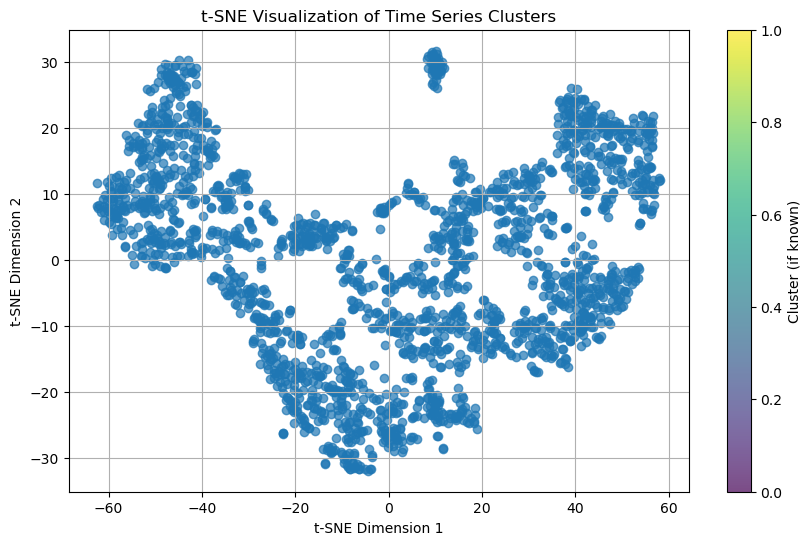

In [81]:
tsne_visualization(train_df, perplexity=40,  random_state=42)

In [82]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import math

def gmm_clustering_and_plot(df_long, n_clusters=5):
    """
    Applies Gaussian Mixture Modeling (GMM) to cluster time-series data in df_long,
    plots the time series for each cluster dynamically in subplots, and displays the BIC score.
    
    Parameters:
        df_long (DataFrame): Long-format DataFrame where each row represents a time series.
                             Assumes time-series values start from column index 1 onward.
        n_clusters (int): Number of clusters to form using GMM.
        
    Returns:
        df_long (DataFrame): Updated DataFrame with an additional 'Cluster' column indicating the cluster label.
        gmm (GaussianMixture): The fitted GMM model.
        bic_score (float): The Bayesian Information Criterion (BIC) score.
    """
    # Extract only the time-series data (excluding timestamp or identifier column)
    time_series_data = df_long.iloc[:, 1:-10]  # Exclude the first column (assumed to be timestamp or ID)
    
    # Fit Gaussian Mixture Model and compute BIC
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(time_series_data)
    bic_score = gmm.bic(time_series_data)  # Compute BIC score
    
    # Add cluster labels to the DataFrame
    df_long['Cluster'] = gmm_labels
    
    # Calculate the grid size for subplots
    n_rows = math.ceil(math.sqrt(n_clusters))
    n_cols = math.ceil(n_clusters / n_rows)
    
    # Set up the figure for subplots
    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    
    time_columns = df_long.columns[1:-10]  # Time-series columns (excluding ID and 'Cluster')
    
    # Loop through each cluster and create a subplot
    for cluster in range(n_clusters):
        # Get the indices of rows in the current cluster
        cluster_indices = df_long[df_long['Cluster'] == cluster].index
        
        # Extract the time series data for the current cluster
        cluster_data = time_series_data.loc[cluster_indices, time_columns].values
        
        # Compute the average time series for the current cluster
        cluster_average = np.mean(cluster_data, axis=0)
        
        # Get the number of instances in the cluster
        cluster_size = len(cluster_indices)
        
        # Create a subplot for this cluster
        plt.subplot(n_rows, n_cols, cluster + 1)  # Arrange subplots dynamically
        
        # Plot individual time series in gray
        for time_series in cluster_data:
            plt.plot(time_series, color='gray', alpha=0.5)
        
        # Plot the average time series in blue
        plt.plot(cluster_average, color='blue', linewidth=3, label='Reference Load Profile')
        
        # Add titles and labels
        plt.title(f"Cluster {cluster + 1} (N={cluster_size})")
        plt.xlabel("Time Interval (15-mins)")
        plt.ylabel("Electric Consumption (kWh)")
        plt.legend()
        plt.grid(True)
    
    # Add a global title and adjust layout
    plt.suptitle(f"GMM Clustering: Time Series for Each Cluster\nBIC Score: {bic_score:.2f}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the global title
    plt.show()
    
    print(f"BIC Score for {n_clusters} clusters: {bic_score:.2f}")
    
    return df_long, gmm, bic_score


In [83]:
train_df

Time,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,22:00:00,23:00:00,month,DayOfWeek,hour,season,weekday,term_time,term_week,IsHoliday
0,2015-08-01,61.114998,60.759999,60.639999,61.317498,60.762499,59.717499,100.874998,162.507496,172.074997,...,66.927498,62.469999,8,5,0,3,0,0,0,0
1,2014-06-17,61.697499,61.397499,60.902498,52.009998,46.579999,72.524999,86.179996,130.609999,137.590000,...,60.272498,59.262498,6,1,0,3,1,0,0,0
2,2015-11-15,64.274999,63.834999,64.202498,64.959999,65.367498,64.872499,66.512499,62.122499,49.192499,...,67.820000,68.102497,11,6,0,4,0,1,0,0
3,2023-01-10,63.809999,63.714999,56.770000,56.870000,56.499998,58.497499,55.737498,50.922500,55.437498,...,72.615000,73.479996,1,1,0,1,1,1,1,1
4,2017-04-30,67.897499,69.744997,68.412498,68.512497,67.789999,48.657498,50.314999,50.619998,49.702498,...,69.562498,67.709999,4,6,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,2019-08-29,61.487497,63.337500,63.817500,59.642499,58.882499,73.832498,101.114998,119.369995,129.809994,...,61.349998,60.604998,8,3,0,3,1,0,0,0
2163,2018-02-19,66.714998,67.072498,67.102499,66.812498,66.542500,105.834997,126.187494,147.117500,168.512501,...,78.855000,69.532499,2,0,0,1,1,1,1,1
2164,2018-10-06,75.087498,74.109997,74.159998,72.820000,55.367498,56.697499,57.847499,59.662499,60.007499,...,74.349998,72.579998,10,5,0,4,0,1,0,0
2165,2016-10-17,61.084998,61.284998,61.264997,67.587498,69.105000,104.672497,125.224995,163.239998,167.194996,...,67.254999,64.099998,10,0,0,4,1,1,1,1


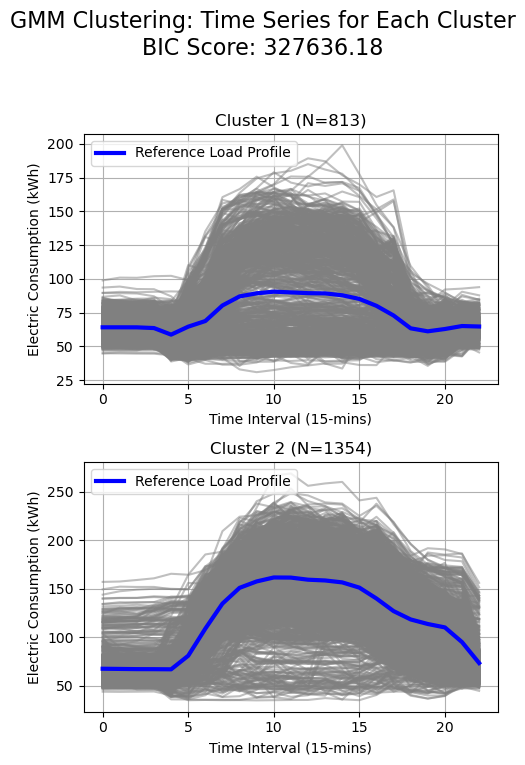

BIC Score for 2 clusters: 327636.18


In [85]:
clustered_df, model,bic  = gmm_clustering_and_plot(train_df, n_clusters=2)


In [86]:
from sklearn.metrics import silhouette_score, silhouette_samples

def calculate_silhouette(df_long):
    """
    Calculate the silhouette score for the clusters in the DataFrame.

    Parameters:
        df_long (DataFrame): DataFrame containing time-series data and cluster labels.
                             Assumes columns [hour, date, ...time-series values..., Cluster].
    
    Returns:
        overall_score (float): The overall silhouette score for the clustering.
        sample_scores (ndarray): Silhouette scores for each sample in the DataFrame.
    """
    # Extract time-series data and cluster labels
    time_series_columns = df_long.columns[1:-9]  # Exclude 'hour', 'date', and 'Cluster'
    features = df_long[time_series_columns].values
    labels = df_long['Cluster'].values

    # Compute overall silhouette score
    overall_score = silhouette_score(features, labels)

    # Compute silhouette score for each sample
    sample_scores = silhouette_samples(features, labels)

    return overall_score, sample_scores

# Example usage:
overall_score, sample_scores = calculate_silhouette(train_df)
print(f"Overall Silhouette Score: {overall_score}")


Overall Silhouette Score: 0.3301296765568032


In [87]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

def evaluate_gmm_clusters(df_long, min_clusters=2, max_clusters=10):
    """
    Evaluates Gaussian Mixture Models for different cluster sizes and computes AIC, BIC, and Silhouette Score.

    Parameters:
        df_long (DataFrame): Time-series data in long format.
                             Assumes time-series values start from column index 1 onward.
        min_clusters (int): Minimum number of clusters to test.
        max_clusters (int): Maximum number of clusters to test.

    Returns:
        results (dict): Dictionary containing AIC, BIC, and Silhouette Scores for each cluster count.
        optimal_clusters (int): Best cluster count based on the lowest BIC score.
    """
    time_series_data = df_long.iloc[:, 1:-10]  # Extract time-series columns
    
    results = {"n_clusters": [], "AIC": [], "BIC": [], "Silhouette": []}
    
    best_bic = float("inf")
    optimal_clusters = min_clusters

    for n_clusters in range(min_clusters, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        cluster_labels = gmm.fit_predict(time_series_data)

        # Compute metrics
        aic = gmm.aic(time_series_data)
        bic = gmm.bic(time_series_data)
        silhouette = silhouette_score(time_series_data, cluster_labels) if n_clusters > 1 else np.nan  # Silhouette needs at least 2 clusters

        # Store results
        results["n_clusters"].append(n_clusters)
        results["AIC"].append(aic)
        results["BIC"].append(bic)
        results["Silhouette"].append(silhouette)

        # Track best BIC
        if bic < best_bic:
            best_bic = bic
            optimal_clusters = n_clusters

    return results, optimal_clusters

# Example usage:
results, optimal_clusters = evaluate_gmm_clusters(train_df)
print(f"Optimal number of clusters (based on BIC): {optimal_clusters}")
print(results)


Optimal number of clusters (based on BIC): 6
{'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'AIC': [324233.2021118414, 319311.4194576859, 315264.0232230819, 311613.74457482866, 308328.4258899051, 309079.69677188765, 308475.2641796996, 308909.69247560436, 307140.5946742927], 'BIC': [327636.1804137617, 324418.7274600671, 322075.66092592396, 320129.7119781317, 318548.722993669, 321004.32357611245, 322104.22068438533, 324242.978680751, 324178.21057990025], 'Silhouette': [0.331372778548132, 0.3152509974463473, 0.14737723952305845, 0.09514868205401357, 0.06124443423197491, 0.04443750635221108, 0.07738466632670261, 0.09591970375790528, -0.006423324214846154]}


In [88]:
pd.DataFrame(results)

,n_clusters,AIC,BIC,Silhouette
0,2,324233.202112,327636.180414,0.331373
1,3,319311.419458,324418.727460,0.315251
2,4,315264.023223,322075.660926,0.147377
3,5,311613.744575,320129.711978,0.095149
4,6,308328.425890,318548.722994,0.061244
5,7,309079.696772,321004.323576,0.044438
6,8,308475.264180,322104.220684,0.077385
7,9,308909.692476,324242.978681,0.095920
8,10,307140.594674,324178.210580,-0.006423


In [89]:
#Adding in the temporal features 


clustered_df["Date"] = pd.to_datetime(clustered_df["Date"])

# Melt the dataframe to reshape it (Convert wide format to long format)
melted_df = clustered_df.melt(
    id_vars=["Date", "month", "DayOfWeek", "hour", "season", "weekday", "term_time", "term_week", "IsHoliday", "Cluster"],
    var_name="Time",
    value_name="Load"
)

melted_df['temp'] = merged_df['temp']

# Convert Time column to datetime
melted_df["Time"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.time

# Create 'hour' and 'minute' features
melted_df["hour"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.hour
melted_df["minute"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.minute

In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_logistic_regression_sm(clustered_df):
    # Define features and target
    features = ["DayOfWeek", "month", "hour", "temp", "season", "weekday", "IsHoliday"]
    X = clustered_df[features]
    y = clustered_df["Cluster"]

    # Add intercept for statsmodels
    X = sm.add_constant(X)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train logistic regression using statsmodels
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Print model summary (coefficients, p-values, etc.)
    print(result.summary())

    # Make predictions on the test set
    y_pred = result.predict(X_test)
    
    # Round predictions to the nearest integer (for classification tasks)
    y_pred_rounded = np.round(y_pred).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_rounded)
    print(f"\nModel Accuracy: {accuracy:.3f}")

    return result

# Train model
logit_results = train_logistic_regression_sm(melted_df)


Optimization terminated successfully.
         Current function value: 0.579024
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Cluster   No. Observations:                41606
Model:                          Logit   Df Residuals:                    41598
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Mar 2025   Pseudo R-squ.:                  0.1249
Time:                        13:42:23   Log-Likelihood:                -24091.
converged:                       True   LL-Null:                       -27528.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2007      0.067     -2.977      0.003      -0.333      -0.069
DayOfWeek      0.0111      0.

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


clustered_df["Date"] = pd.to_datetime(clustered_df["Date"])

# Melt the dataframe to reshape it (Convert wide format to long format)
melted_df = clustered_df.melt(
    id_vars=["Date", "month", "DayOfWeek", "hour", "season", "weekday", "term_time", "term_week", "IsHoliday", "Cluster"],
    var_name="Time",
    value_name="Load"
)

melted_df['temp'] = merged_df['temp']

# Convert Time column to datetime
melted_df["Time"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.time

# Create 'hour' and 'minute' features
melted_df["hour"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.hour
melted_df["minute"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.minute

# Compute the cluster-wise average load profile
avg_profile = melted_df.groupby(["Cluster", "hour", "minute"])["Load"].mean().reset_index()
avg_profile.rename(columns={"Load": "Avg_Load"}, inplace=True)

# Merge the average profile back to the data
melted_df = melted_df.merge(avg_profile, on=["Cluster", "hour", "minute"], how="left")

# Create lag features (Previous time step load)
melted_df["Prev_Load"] = melted_df.groupby(["Cluster", "hour", "minute"])["Load"].shift(1)
melted_df["Prev_Load"].fillna(melted_df["Avg_Load"], inplace=True)  # Fill missing values

# Define Features and Target
features = ["Avg_Load", "hour","minute","temp", "season", "term_week", "Cluster"]
target = "Load"

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(melted_df[features], melted_df[target], test_size=0.2, random_state=42)

# Train a Regression Model (Try Linear Regression and Random Forest)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Models
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate regression model performance and print metrics."""
    
    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Calculate MAPE (avoid division by zero)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-5))) * 100  # Avoid zero division
    accuracy = 100 - mape  # Higher is better

    # Print results
    print(f" {model_name} Performance:")
    print(f"R² Score: {r2:.3f} ")
    print(f"MAE: {mae:.3f} ")
    print(f"RMSE: {rmse:.3f} ")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)


evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



 Linear Regression Performance:
R² Score: 0.643 
MAE: 20.449 
RMSE: 27.323 
Accuracy: 76.47%
----------------------------------------
 Random Forest Performance:
R² Score: 0.553 
MAE: 21.925 
RMSE: 30.569 
Accuracy: 75.34%
----------------------------------------


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert "Date" to datetime format
clustered_df["Date"] = pd.to_datetime(clustered_df["Date"])

# Melt the dataframe (Convert wide format to long format)
melted_df = clustered_df.melt(
    id_vars=["Date", "month", "DayOfWeek", "hour", "season", "weekday", "term_time", "term_week", "IsHoliday", "Cluster"],
    var_name="Time",
    value_name="Load"
)

# Add temperature feature
melted_df['temp'] = merged_df['temp']

# Convert Time column to datetime
melted_df["Time"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.time

# Extract 'hour' and 'minute' features
melted_df["hour"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.hour
melted_df["minute"] = pd.to_datetime(melted_df["Time"], format="%H:%M:%S").dt.minute

# Compute the global average load profile (Overall mean Load for each hour & minute)
global_avg_profile = melted_df.groupby([ "Date"])["Load"].mean().reset_index()
global_avg_profile.rename(columns={"Load": "daily_avg_load"}, inplace=True)

# Compute the cluster-specific average load profile
cluster_avg_profile = melted_df.groupby(["Cluster", "hour", "minute"])["Load"].mean().reset_index()
cluster_avg_profile.rename(columns={"Load": "cluster_avg_load"}, inplace=True)

# Merge both average profiles back into the data
melted_df = melted_df.merge(global_avg_profile, on=["Date"], how="left")
melted_df = melted_df.merge(cluster_avg_profile, on=["Cluster",  "hour", "minute"], how="left")

# Fill missing cluster_avg_load with global_avg_load (for unseen clusters/times)
melted_df["cluster_avg_load"].fillna(melted_df["daily_avg_load"], inplace=True)

# Create lag feature (Previous time step load)
melted_df["Prev_Load"] = melted_df.groupby(["Cluster", "hour", "minute"])["Load"].shift(1)
melted_df["Prev_Load"].fillna(melted_df["daily_avg_load"], inplace=True)  # Fill missing values

# Define Features and Target
features = ["daily_avg_load", "cluster_avg_load", "DayOfWeek", "hour", "weekday", "minute", "temp", "season", "term_week", "Cluster"]
target = "Load"

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(melted_df[features], melted_df[target], test_size=0.2, random_state=42)

# Train Regression Models (Linear Regression & Random Forest)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    """Evaluate regression model performance and print metrics."""
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Calculate MAPE (avoid division by zero)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-5))) * 100  # Avoid zero division
    accuracy = 100 - mape  # Higher is better

    # Print results
    print(f" {model_name} Performance:")
    print(f"R² Score: {r2:.3f} ")
    print(f"MAE: {mae:.3f} ")
    print(f"RMSE: {rmse:.3f} ")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)

# Evaluate Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


 Linear Regression Performance:
R² Score: 0.842 
MAE: 14.898 
RMSE: 18.186 
Accuracy: 81.62%
----------------------------------------
 Random Forest Performance:
R² Score: 0.949 
MAE: 7.089 
RMSE: 10.327 
Accuracy: 92.43%
----------------------------------------


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the moving average window (e.g., past 3 time steps)
moving_avg_window = 3


# Compute global moving average (using all data, regardless of the cluster)
melted_df["Daily_Moving_Avg"] = (
    melted_df.groupby(["Date"])["Load"]
    .transform(lambda x: x.rolling(window=moving_avg_window, min_periods=1).mean())
)

# Compute cluster-specific moving average (within each cluster and hour/minute)
melted_df["Cluster_Moving_Avg"] = (
    melted_df.groupby(["Cluster", "hour", "minute"])["Load"]
    .transform(lambda x: x.rolling(window=moving_avg_window, min_periods=1).mean())
)

# Define Features and Target (Adding all moving averages)
features = [
    "daily_avg_load", "cluster_avg_load", "DayOfWeek", "hour", "weekday", "minute", "month", "season", 
    "term_week", "temp", "Daily_Moving_Avg", "Cluster_Moving_Avg", "Cluster"
]
target = "Load"

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(melted_df[features], melted_df[target], test_size=0.2, random_state=42)

# Train Regression Models (Linear Regression & Random Forest)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    """Evaluate regression model performance and print metrics."""
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Calculate MAPE (avoid division by zero)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-5))) * 100  # Avoid zero division
    accuracy = 100 - mape  # Higher is better

    # Print results
    print(f" {model_name} Performance:")
    print(f"R² Score: {r2:.3f} ")
    print(f"MAE: {mae:.3f} ")
    print(f"RMSE: {rmse:.3f} ")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)

# Evaluate Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


 Linear Regression Performance:
R² Score: 0.958 
MAE: 7.147 
RMSE: 9.374 
Accuracy: 91.84%
----------------------------------------
 Random Forest Performance:
R² Score: 0.984 
MAE: 3.894 
RMSE: 5.731 
Accuracy: 95.86%
----------------------------------------


In [94]:
X_train

,daily_avg_load,cluster_avg_load,DayOfWeek,hour,weekday,minute,month,season,term_week,temp,Daily_Moving_Avg,Cluster_Moving_Avg,Cluster
50561,131.397810,68.452159,4,23,1,0,4,2,1,11.2,85.792498,65.656666,1
18842,68.037082,150.911016,3,8,1,0,10,4,1,1.8,75.784999,142.419998,1
15045,52.771457,68.750518,6,6,0,0,5,2,0,11.7,49.439166,64.991665,0
37309,100.032290,72.856213,4,17,1,0,11,4,1,16.4,110.809997,83.800831,0
4253,111.719268,64.102809,0,1,1,0,5,2,0,12.8,68.413750,64.988332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,54.843540,64.583427,6,5,0,0,12,1,0,9.8,58.004165,70.632499,0
44732,57.922603,62.844722,4,20,1,0,12,1,0,15.3,69.467500,66.324166,0
38158,68.520103,72.856213,2,17,1,0,3,2,1,6.0,69.064166,74.718331,0
860,104.881039,67.656638,5,0,0,0,4,2,0,1.3,93.477497,72.796665,1


In [95]:
import statsmodels.api as sm

features = [
    "daily_avg_load", "cluster_avg_load", "DayOfWeek", "hour", "minute", "month", "season", 
    "term_week", "temp", "Daily_Moving_Avg", "Cluster_Moving_Avg", "Cluster", "weekday"
]
# Add a constant for intercept
X_train_sm = sm.add_constant(X_train[features])

# Fit an OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print model summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Load   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 7.664e+04
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:42:39   Log-Likelihood:            -1.5245e+05
No. Observations:               41606   AIC:                         3.049e+05
Df Residuals:                   41593   BIC:                         3.050e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.5586      0

In [96]:
import statsmodels.api as sm

def backward_stepwise_selection(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_train_sm = sm.add_constant(X[features])
        model = sm.OLS(y, X_train_sm).fit()
        
        # Get the feature with the highest p-value
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    
    return features, model

# Select best features
X_train_sm = X_train[features]
best_features, best_model = backward_stepwise_selection(X_train_sm, y_train)

# Print final model summary
print("Selected Features:", best_features)
print(best_model.summary())


Selected Features: ['daily_avg_load', 'cluster_avg_load', 'hour', 'minute', 'Daily_Moving_Avg', 'Cluster_Moving_Avg', 'Cluster']
                            OLS Regression Results                            
Dep. Variable:                   Load   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.533e+05
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:42:40   Log-Likelihood:            -1.5245e+05
No. Observations:               41606   AIC:                         3.049e+05
Df Residuals:                   41599   BIC:                         3.050e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

In [97]:
print(f"Train R²: {lr_model.score(X_train, y_train):.3f}")
print(f"Test R²: {lr_model.score(X_test, y_test):.3f}")


Train R²: 0.957
Test R²: 0.958


In [77]:
y_test = model.predict(test_df.iloc[:,1:-8])
test_df['Cluster'] = y_test

In [103]:
train_df.iloc[:,1:-9]

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,61.114998,60.759999,60.639999,61.317498,60.762499,59.717499,100.874998,162.507496,172.074997,156.707500,...,135.195000,132.424999,151.449997,139.834999,127.394997,122.574997,113.844999,113.617498,66.927498,62.469999
1,61.697499,61.397499,60.902498,52.009998,46.579999,72.524999,86.179996,130.609999,137.590000,157.535000,...,143.647495,147.667496,128.107498,85.319998,67.809999,58.787499,60.629999,50.664998,60.272498,59.262498
2,64.274999,63.834999,64.202498,64.959999,65.367498,64.872499,66.512499,62.122499,49.192499,49.604999,...,51.279998,51.557499,52.457499,72.309998,69.642498,71.502499,68.552498,67.492498,67.820000,68.102497
3,63.809999,63.714999,56.770000,56.870000,56.499998,58.497499,55.737498,50.922500,55.437498,67.529999,...,48.154999,48.397499,51.962499,58.479999,66.885000,71.455000,74.569998,79.782497,72.615000,73.479996
4,67.897499,69.744997,68.412498,68.512497,67.789999,48.657498,50.314999,50.619998,49.702498,48.852499,...,49.647499,48.582499,48.747499,47.892498,47.499999,47.699999,67.424998,70.299999,69.562498,67.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,61.487497,63.337500,63.817500,59.642499,58.882499,73.832498,101.114998,119.369995,129.809994,136.477499,...,134.944996,119.174997,92.657499,81.090000,68.227498,68.930000,73.497499,64.872499,61.349998,60.604998
2163,66.714998,67.072498,67.102499,66.812498,66.542500,105.834997,126.187494,147.117500,168.512501,186.082497,...,211.987495,200.937496,196.404995,160.794998,162.987499,145.209999,134.782497,125.094997,78.855000,69.532499
2164,75.087498,74.109997,74.159998,72.820000,55.367498,56.697499,57.847499,59.662499,60.007499,58.997499,...,59.899999,60.167499,61.042499,60.139998,58.917499,57.809999,57.349998,72.920001,74.349998,72.579998
2165,61.084998,61.284998,61.264997,67.587498,69.105000,104.672497,125.224995,163.239998,167.194996,185.722496,...,177.377495,171.447498,148.972496,138.375000,148.680000,136.544994,122.624996,83.287497,67.254999,64.099998


In [104]:
from sklearn.metrics import silhouette_score, silhouette_samples

def calculate_silhouette(df_long):
    """
    Calculate the silhouette score for the clusters in the DataFrame.

    Parameters:
        df_long (DataFrame): DataFrame containing time-series data and cluster labels.
                             Assumes columns [hour, date, ...time-series values..., Cluster].
    
    Returns:
        overall_score (float): The overall silhouette score for the clustering.
        sample_scores (ndarray): Silhouette scores for each sample in the DataFrame.
    """
    # Extract time-series data and cluster labels
    time_series_columns = df_long.columns[1:-9]  # Exclude 'hour', 'date', and 'Cluster'
    features = df_long[time_series_columns].values
    labels = df_long['Cluster'].values

    # Compute overall silhouette score
    overall_score = silhouette_score(features, labels)

    # Compute silhouette score for each sample
    sample_scores = silhouette_samples(features, labels)

    return overall_score, sample_scores

# Example usage:
overall_score, sample_scores = calculate_silhouette(train_df)
print(f"Overall Silhouette Score: {overall_score}")


Overall Silhouette Score: 0.3136079451404164


In [58]:
import pandas as pd
import numpy as np

def compute_cluster_detailed_statistics(filtered_df):
    """
    Computes detailed statistics for each cluster, including:
    - Peak (highest value of the mean for all time-series columns)
    - Time of Peak (column where the peak occurs)
    - Drop (lowest value of the mean for all time-series columns)
    - Time of Drop (column where the drop occurs)
    - Standard deviation of the mean for all time-series columns

    Parameters:
        filtered_df (DataFrame): DataFrame with time-series data and a 'Cluster' column.
    
    Returns:
        detailed_stats (DataFrame): DataFrame with peak, time of peak, drop, time of drop,
                                    and standard deviation of the mean for each cluster.
    """
    # Select only time-series columns (excluding 'Date' and 'Cluster')
    time_columns = filtered_df.columns[1:-3]
    
    # Group by 'cluster_label' and compute the mean for time-series columns
    cluster_means = filtered_df.groupby('Cluster')[time_columns].mean()
    
    # Compute the peak (highest mean) and the time of the peak
    peak_values = cluster_means.max(axis=1)  # Highest mean value across all columns
    time_of_peak = cluster_means.idxmax(axis=1)  # Column name (time) of the highest mean value
    
    # Compute the drop (lowest mean) and the time of the drop
    drop_values = cluster_means.min(axis=1)  # Lowest mean value across all columns
    time_of_drop = cluster_means.idxmin(axis=1)  # Column name (time) of the lowest mean value
    
    # Compute the standard deviation of means
    std_of_means = cluster_means.std(axis=1)
    
    # Create a DataFrame for the detailed stats
    stats = {
        "Peak (Highest Mean)": peak_values,
        "Time of Peak": time_of_peak,
        "Drop (Lowest Mean)": drop_values,
        "Time of Drop": time_of_drop,
        "Standard Deviation of Means": std_of_means
    }
    
    detailed_stats = pd.DataFrame(stats)
    
    return detailed_stats

# Example usage
detailed_statistics = compute_cluster_detailed_statistics(train_df)

# Display the result
(detailed_statistics)


,Peak (Highest Mean),Time of Peak,Drop (Lowest Mean),Time of Drop,Standard Deviation of Means
Cluster,,,,,
0,90.474171,10:00:00,0.0,hour,30.925215
1,161.582232,10:00:00,0.0,hour,56.841191


In [217]:
for group in days_df.groupby("Cluster"):
    print(group[1].term_week.value_counts())

term_week
0    650
1    163
Name: count, dtype: int64
term_week
1    788
0    566
Name: count, dtype: int64


In [218]:
for group in days_df.groupby("Cluster"):
    print(group[1].month.value_counts()/len(group[1].month)*100)

month
6     14.022140
7     13.407134
8     10.086101
5      9.840098
4      7.872079
12     7.749077
10     7.257073
9      6.642066
3      6.642066
11     6.273063
2      5.781058
1      4.428044
Name: count, dtype: float64
month
1     11.373708
3     10.339734
11     9.601182
4      9.158050
10     8.936484
2      8.936484
5      8.493353
9      8.124077
12     7.976366
8      6.720827
7      5.317578
6      5.022157
Name: count, dtype: float64


In [219]:
for group in days_df.groupby("Cluster"):
    print(group[1].DayOfWeek.value_counts()/len(group[1].DayOfWeek)*100)

DayOfWeek
6    24.723247
5    23.001230
4    11.316113
0    11.316113
3    10.332103
2     9.840098
1     9.471095
Name: count, dtype: float64
DayOfWeek
3    17.429838
4    16.543575
2    16.395864
1    16.248154
0    15.509601
6     9.010340
5     8.862629
Name: count, dtype: float64


Time,23:45:00,month,DayOfWeek,hour,season,weekday,term_time,term_week,IsHoliday,Cluster
0,15.177500,8,5,0,3,0,0,0,0,1
1,14.549999,6,1,0,3,1,0,0,0,0
2,16.997499,11,6,0,4,0,1,0,0,2
3,18.234999,1,1,0,1,1,1,1,1,2
4,17.107500,4,6,0,2,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
2162,15.275000,8,3,0,3,1,0,0,0,0
2163,17.287500,2,0,0,1,1,1,1,1,1
2164,17.510000,10,5,0,4,0,1,0,0,2
2165,15.429999,10,0,0,4,1,1,1,1,1


C:\Users\manya\AppData\Local\Temp\ipykernel_27488\3715561210.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('merged_quinn_weather.csv').iloc[:,1:]


,temp,timestamp
0,2.7,2013-01-01 00:00:00
1,3.2,2013-01-01 01:00:00
2,2.7,2013-01-01 02:00:00
3,2.5,2013-01-01 03:00:00
4,2.7,2013-01-01 04:00:00
...,...,...
95995,8.1,2023-12-14 19:00:00
95996,8.0,2023-12-14 20:00:00
95997,8.3,2023-12-14 21:00:00
95998,8.3,2023-12-14 22:00:00


C:\Users\manya\AppData\Local\Temp\ipykernel_27488\4200431119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['date'] = pd.to_datetime(temp['timestamp']).dt.date  # Extract the date
